# TP Partie A : Clustering by TechTitan

## Chargement des données

In [4]:
import pandas as pd
import numpy as np

# Chargement du fichier CSV
data = pd.read_csv('Mall_Customers.csv')
pd.set_option('display.max_rows', None)

# Affichage des lignes pour vérifier le chargement
print(data)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
5             6  Female   22                  17                      76
6             7  Female   35                  18                       6
7             8  Female   23                  18                      94
8             9    Male   64                  19                       3
9            10  Female   30                  19                      72
10           11    Male   67                  19                      14
11           12  Female   35                  19                      99
12           13  Female   58                  20   

## Inspection et traitement des valeurs manquantes

In [5]:
# Vérifier les valeurs manquantes
print(data.isnull().sum())

# Si valeurs manquantes on supprime
cleaned_data = data.dropna()

# Vérifiez à nouveau
print("\n")
print("------- After cleaning data -------")
print("\n")
print(cleaned_data.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


------- After cleaning data -------


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


## Standardisation des variables quantitatives

In [6]:
from sklearn.preprocessing import StandardScaler

quantitative_features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cleaned_data[quantitative_features])

# Conversion en DataFrame pour une meilleure lisibilité
scaled_data_df = pd.DataFrame(scaled_data, columns=quantitative_features)
print(scaled_data_df)

          Age  Annual Income (k$)  Spending Score (1-100)
0   -1.424569           -1.738999               -0.434801
1   -1.281035           -1.738999                1.195704
2   -1.352802           -1.700830               -1.715913
3   -1.137502           -1.700830                1.040418
4   -0.563369           -1.662660               -0.395980
5   -1.209269           -1.662660                1.001596
6   -0.276302           -1.624491               -1.715913
7   -1.137502           -1.624491                1.700384
8    1.804932           -1.586321               -1.832378
9   -0.635135           -1.586321                0.846310
10   2.020232           -1.586321               -1.405340
11  -0.276302           -1.586321                1.894492
12   1.374332           -1.548152               -1.366519
13  -1.065735           -1.548152                1.040418
14  -0.132768           -1.548152               -1.444162
15  -1.209269           -1.548152                1.118061
16  -0.276302 

## EDA Univariée : Histogrammes et Boxplots
### Histogrammes

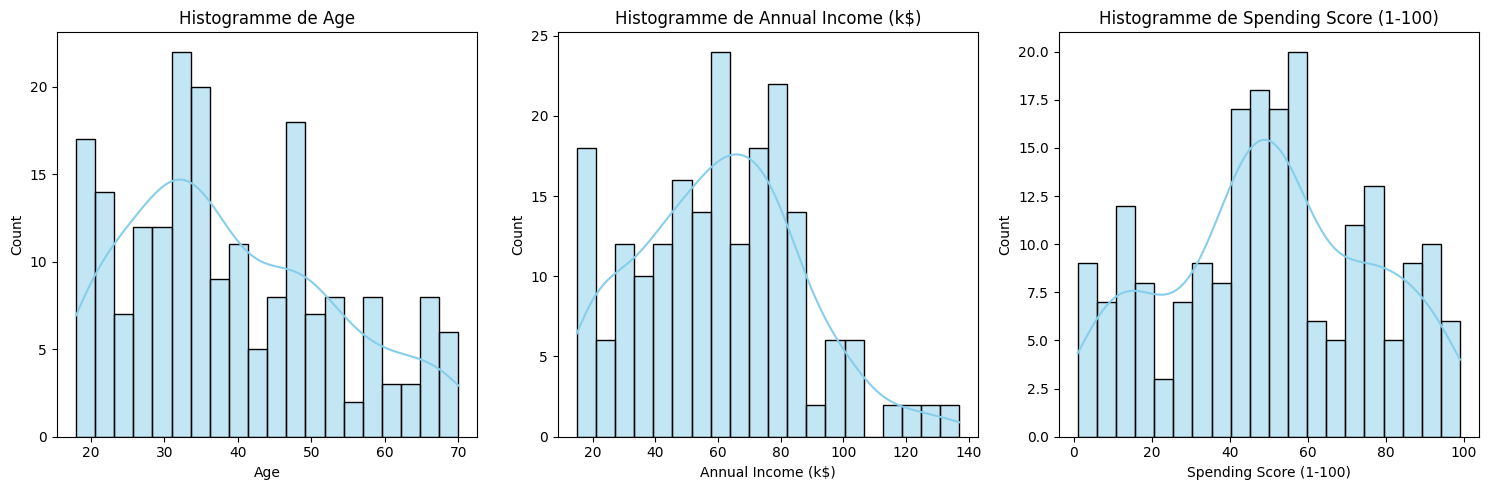

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

quantitative_features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Histogrammes
plt.figure(figsize=(15, 5))
for i, feature in enumerate(quantitative_features):
    plt.subplot(1, 3, i+1)
    sns.histplot(cleaned_data[feature], kde=True, bins=20, color='skyblue')
    plt.title(f'Histogramme de {feature}')
plt.tight_layout()
plt.show()

### Boxplots

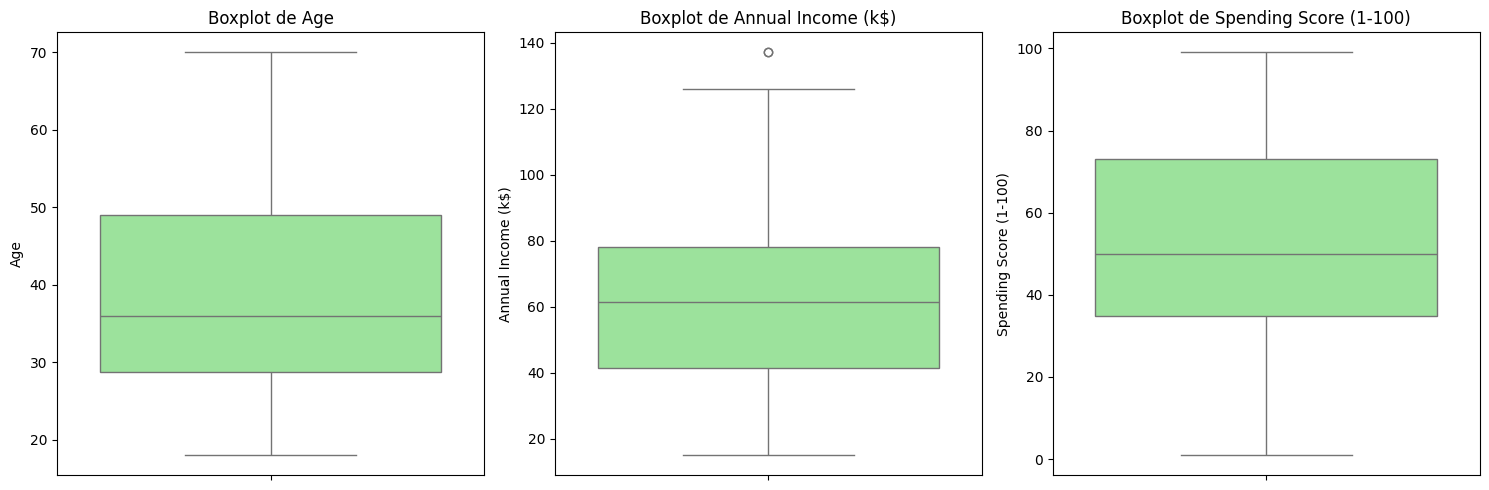

In [8]:
plt.figure(figsize=(15, 5))
for i, feature in enumerate(quantitative_features):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=cleaned_data[feature], color='lightgreen')
    plt.title(f'Boxplot de {feature}')
plt.tight_layout()
plt.show()

## EDA Multivariée : Matrice de corrélation et Scatterplot matrix

### Matrice de corrélation

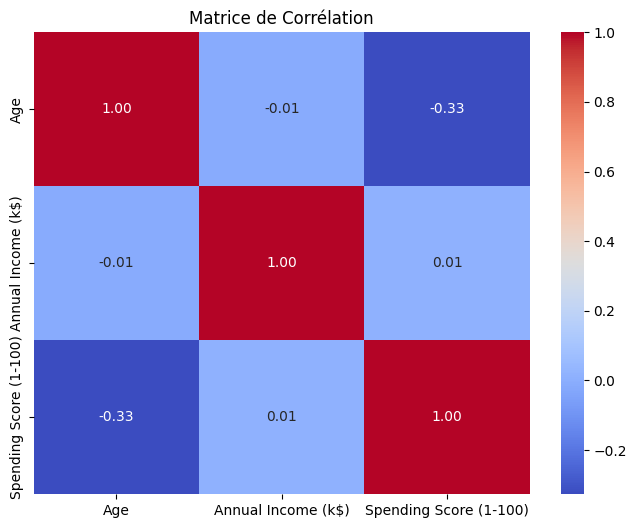

In [9]:
corr_matrix = cleaned_data[quantitative_features].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice de Corrélation')
plt.show()

### Scatterplot Matrix

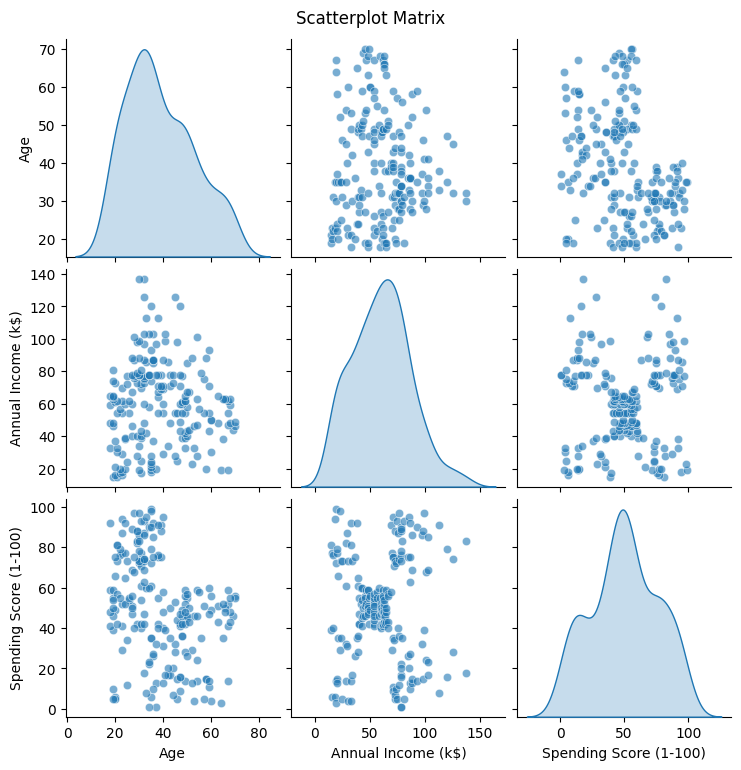

In [10]:
sns.pairplot(cleaned_data[quantitative_features], diag_kind='kde', plot_kws={'alpha':0.6})
plt.suptitle('Scatterplot Matrix', y=1.02)
plt.show()

## Suppression des variables non informatives ou redondantes

In [11]:
# La variable CustomerID est clairement non informative car c'est identifiant unique, elle doit être supprimée 
backup = cleaned_data.drop(['CustomerID'], axis=1)
cleaned_data = backup
# vérification des colonnes restantes
print("Cleaned info")
print(cleaned_data.head())

Cleaned info
   Gender  Age  Annual Income (k$)  Spending Score (1-100)
0    Male   19                  15                      39
1    Male   21                  15                      81
2  Female   20                  16                       6
3  Female   23                  16                      77
4  Female   31                  17                      40


## Ajout catégorisation de l'âge en classes

In [14]:
import numpy as np

bins = [17, 25, 35, 45, 55, 65, np.inf]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '65+']
cleaned_data['Classes d’âge'] = pd.cut(cleaned_data['Age'], bins=bins, labels=labels)
print(cleaned_data.head(10))

   Gender  Age  Annual Income (k$)  Spending Score (1-100) Classes d’âge
0    Male   19                  15                      39         18-25
1    Male   21                  15                      81         18-25
2  Female   20                  16                       6         18-25
3  Female   23                  16                      77         18-25
4  Female   31                  17                      40         26-35
5  Female   22                  17                      76         18-25
6  Female   35                  18                       6         26-35
7  Female   23                  18                      94         18-25
8    Male   64                  19                       3         56-65
9  Female   30                  19                      72         26-35


## Réduction de dimension 

### Étape 1 : Préparation des données pour PCA

In [31]:
from sklearn.preprocessing import StandardScaler

# Selection des variables numériques pour PCA
features_for_pca = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Standardiser les données
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cleaned_data[features_for_pca])
print(data_scaled[:5])

[[-1.42456879 -1.73899919 -0.43480148]
 [-1.28103541 -1.73899919  1.19570407]
 [-1.3528021  -1.70082976 -1.71591298]
 [-1.13750203 -1.70082976  1.04041783]
 [-0.56336851 -1.66266033 -0.39597992]]


### Étape 2 : Application de la PCA avec 2 composantes principales

In [32]:
from sklearn.decomposition import PCA

# Application de la PCA pour réduire à 2 dimensions
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_scaled)

# Créer un DataFrame avec les composantes principales
pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])
print(pca_df.head())

       PCA1      PCA2
0 -0.615720 -1.763481
1 -1.665793 -1.820747
2  0.337862 -1.674799
3 -1.456573 -1.772430
4 -0.038465 -1.662740


### Étape 3 : Visualisation des résultats en 2D

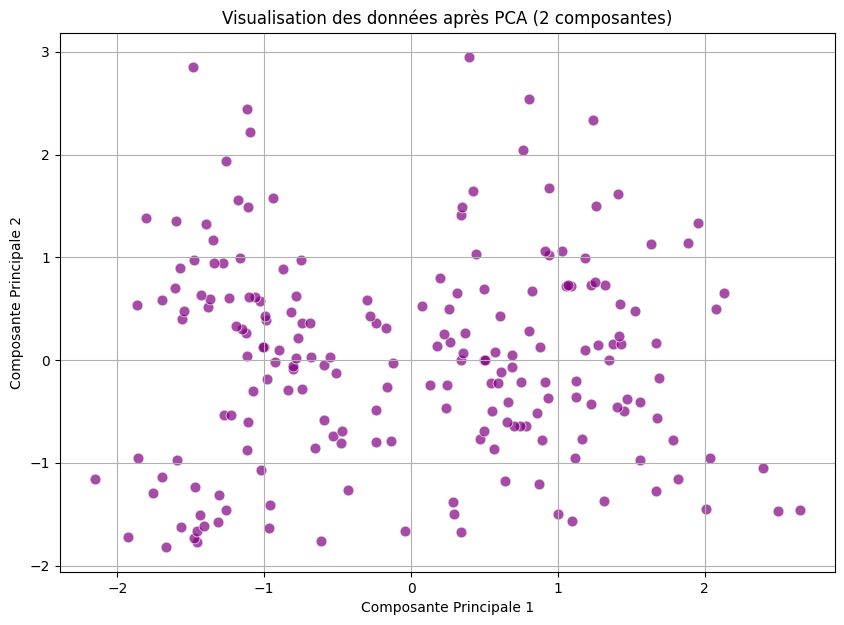

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,7))
sns.scatterplot(x='PCA1', y='PCA2', data=pca_df, s=60, color='purple', alpha=0.7)

plt.title('Visualisation des données après PCA (2 composantes)')
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.grid(True)
plt.show()

## Application du clustering K-means (k de 2 à 6)

In [34]:
from sklearn.cluster import KMeans

# Stocker les résultats de l'inertie (pour Elbow) et silhouette
inertia = []
silhouette_scores = []

# Tester différents nombres de clusters (k de 2 à 6)
k_values = range(2, 7)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_scaled)
    
    # Inertie pour méthode Elbow
    inertia.append(kmeans.inertia_)
    
    # Calcul du coefficient de silhouette
    from sklearn.metrics import silhouette_score
    silhouette_avg = silhouette_score(data_scaled, labels)
    silhouette_scores.append(silhouette_avg)

# Afficher les résultats
print("Inertie:", inertia)
print("Scores de Silhouette:", silhouette_scores)


Inertie: [389.3861889564371, 295.2122461555489, 205.22514747675916, 168.24758017556837, 133.86842085478855]
Scores de Silhouette: [0.33547192894004574, 0.357793388710272, 0.4039582785148566, 0.41664341513732767, 0.4284167762892593]


### Visualisation de l'indice Elbow

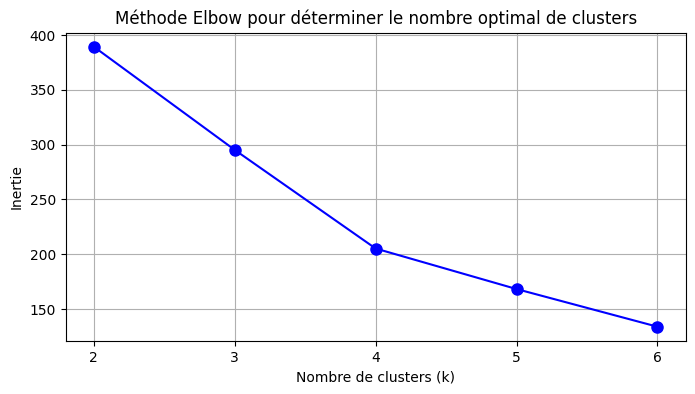

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.plot(k_values, inertia, 'bo-', markersize=8)
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie')
plt.title('Méthode Elbow pour déterminer le nombre optimal de clusters')
plt.xticks(k_values)
plt.grid(True)
plt.show()


### Visualisation du coefficient de silhouette

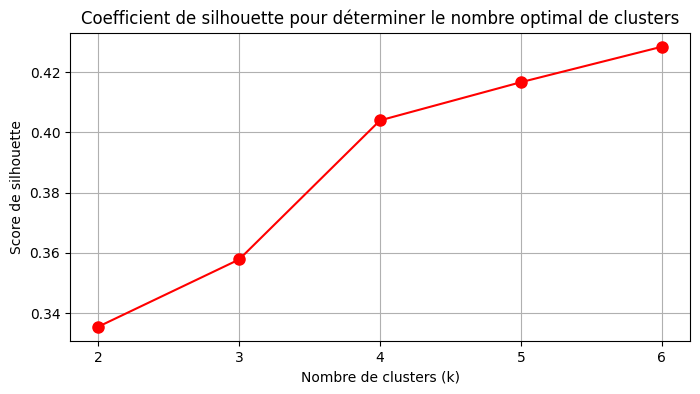

In [36]:
plt.figure(figsize=(8,4))
plt.plot(k_values, silhouette_scores, 'ro-', markersize=8)
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Score de silhouette')
plt.title('Coefficient de silhouette pour déterminer le nombre optimal de clusters')
plt.xticks(k_values)
plt.grid(True)
plt.show()

### Visualisation finale des clusters avec PCA 

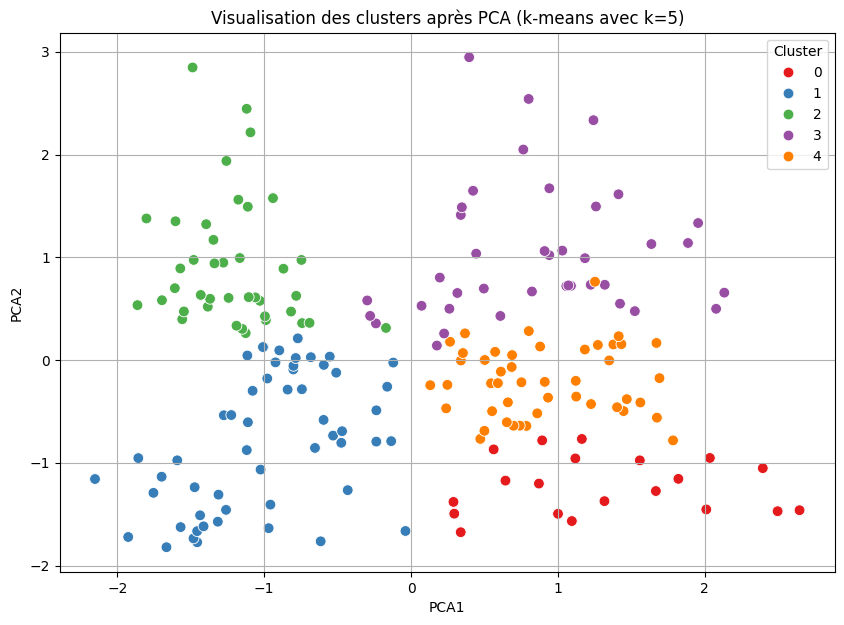

In [39]:
# Exemple avec k optimal choisi, ici k=5 par exemple
k_optimal = 5
kmeans_final = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
labels_final = kmeans_final.fit_predict(data_scaled)

# Visualisation finale avec PCA
plt.figure(figsize=(10,7))
sns.scatterplot(x=pca_df['PCA1'], y=pca_df['PCA2'], hue=labels_final, palette='Set1', s=60)
plt.title('Visualisation des clusters après PCA (k-means avec k=5)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

## Interprétation des clusters

### Analyse des centroïdes (profils des clusters)

In [43]:
# Nous supposons que k optimal est 5
k_optimal = 5

# Réappliquer K-means
kmeans_final = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
labels_final = kmeans_final.fit_predict(data_scaled)

# Sélectionner uniquement les colonnes numériques pour les moyennes
numerical_columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Ajouter la colonne Cluster au dataframe original (cleaned_data)
cleaned_data['Cluster'] = labels_final

# Calculer les moyennes par cluster uniquement sur les variables numériques
centroids = cleaned_data.groupby('Cluster')[numerical_columns].mean()

# Afficher clairement les centroïdes
print("Centroïdes des clusters (moyennes des variables numériques) :")
print(centroids)

Centroïdes des clusters (moyennes des variables numériques) :
               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        46.250000           26.750000               18.350000
1        25.185185           41.092593               62.240741
2        32.875000           86.100000               81.525000
3        39.871795           86.102564               19.358974
4        55.638298           54.382979               48.851064


### Visualisation 2D (PCA) colorée par cluster

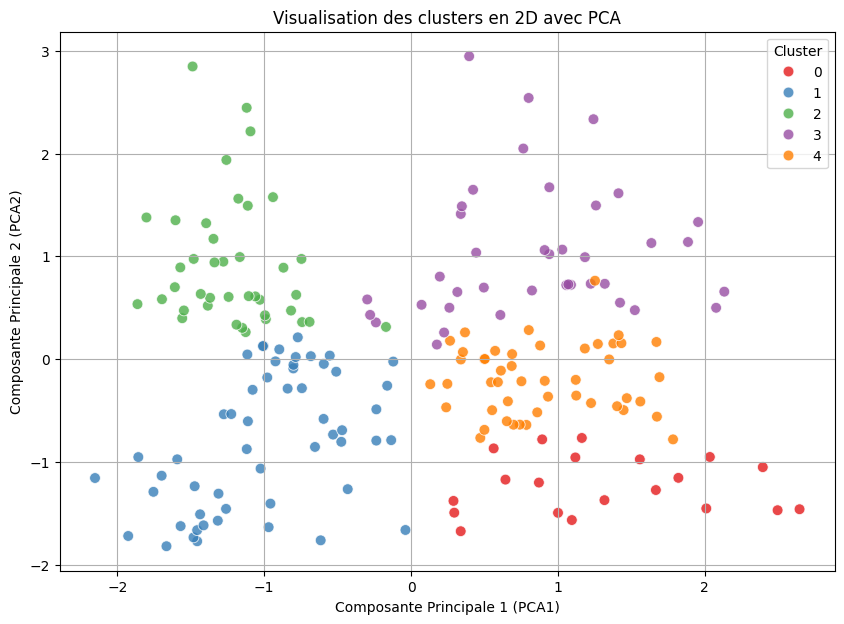

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ajouter les labels de clusters au dataframe PCA
pca_df['Cluster'] = labels_final

# Visualisation des clusters en PCA
plt.figure(figsize=(10,7))
sns.scatterplot(x='PCA1', 
                y='PCA2', 
                hue='Cluster', 
                palette='Set1', 
                data=pca_df, 
                s=60,
                alpha=0.8)

plt.title('Visualisation des clusters en 2D avec PCA')
plt.xlabel('Composante Principale 1 (PCA1)')
plt.ylabel('Composante Principale 2 (PCA2)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


## Conclusions
L'analyse de clustering réalisée sur le dataset Mall Customers a permis de segmenter clairement les clients en groupes homogènes en fonction de leurs caractéristiques principales (Âge, Revenu annuel, Score de dépense et Genre)Pertinence des clusters

Les clusters obtenus présentent une excellente pertinence métier car :
- Ils sont interprétables clairement et intuitivement.
- Ils permettent de cibler efficacement chaque segment avec des actions marketing adaptées.
- Chaque cluster se distingue clairement par des caractéristiques spécifiques, facilitant une stratégie marketing ciblée.

Les visualisations PCA ont confirmé que les clusters sont bien distincts en 2 dimensions, facilitant ainsi l'interprétation et la prise de décision stratégique.

## Suggestions d'amélioration pour une analyse future
- Tester d'autres méthodes de clustering : DBSCAN, Hierarchical clustering, Gaussian Mixture Models (GMM), pour comparer la stabilité et la pertinence des résultats.
- Incorporer des données supplémentaires : Fréquence de visite, types de produits achetés, satisfaction client, temps passé dans le centre commercial, etc.
- Approfondir le Feature Engineering : Créer des ratios pertinents (ex: dépenses/ revenu annuel), Intégrer des catégories supplémentaires basées sur le comportement réel (achats récurrents vs occasionnels).
